In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from dataclasses import dataclass
from typing import OrderedDict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dummy_data = pd.DataFrame().assign(
    x1=np.random.uniform(0, 450, 300)
).assign(
    x2=lambda df: df.x1.map(
        lambda x: 500 - x
    ).map(
        lambda x: x - np.random.uniform(0,200)
    )
).pipe(
    lambda df: df[df.x1>0]
).pipe(
    lambda df: df[df.x2>0]
).pipe(
    lambda df: df[:100]
).assign(
    x1=lambda df: df.x1.map(round).map(lambda x: x*10),
    x2=lambda df: df.x2.map(round).map(lambda x: x*10)
).assign(
    interaction=lambda df: df.x1*df.x2
).assign(
    y=lambda df: 0.2*df.x1 + 0.2*df.x2 + 0.1*df.interaction
).assign(
    y=lambda df: df.y.map(round),
    y_s=lambda df: (df.y - df.y.min())
).assign(
    y_s=lambda df: (df.y_s/df.y_s.max())*100
)

In [3]:
dummy_data

,x1,x2,interaction,y,y_s
0,840,3500,2940000,294868,47.516982
1,1000,3190,3190000,319838,51.635826
3,720,2340,1684800,169092,26.770014
4,3740,1130,4226200,423594,68.750557
5,3360,1010,3393600,340234,55.000181
...,...,...,...,...,...
111,2110,2510,5296100,530534,86.390494
112,2800,2150,6020000,602990,98.342235
113,1280,3670,4697600,470750,76.529020
114,1000,3500,3500000,350900,56.759556


In [4]:
x = dummy_data[["x1", "x2", "interaction"]]

In [5]:
y = dummy_data.y

In [6]:
model = LinearRegression()

In [7]:
model.fit(x,y)

/Users/a13771/.venv/local3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
model.coef_

array([0.2, 0.2, 0.1])

In [9]:
dummy_data.to_csv('interaction_dummies.csv')

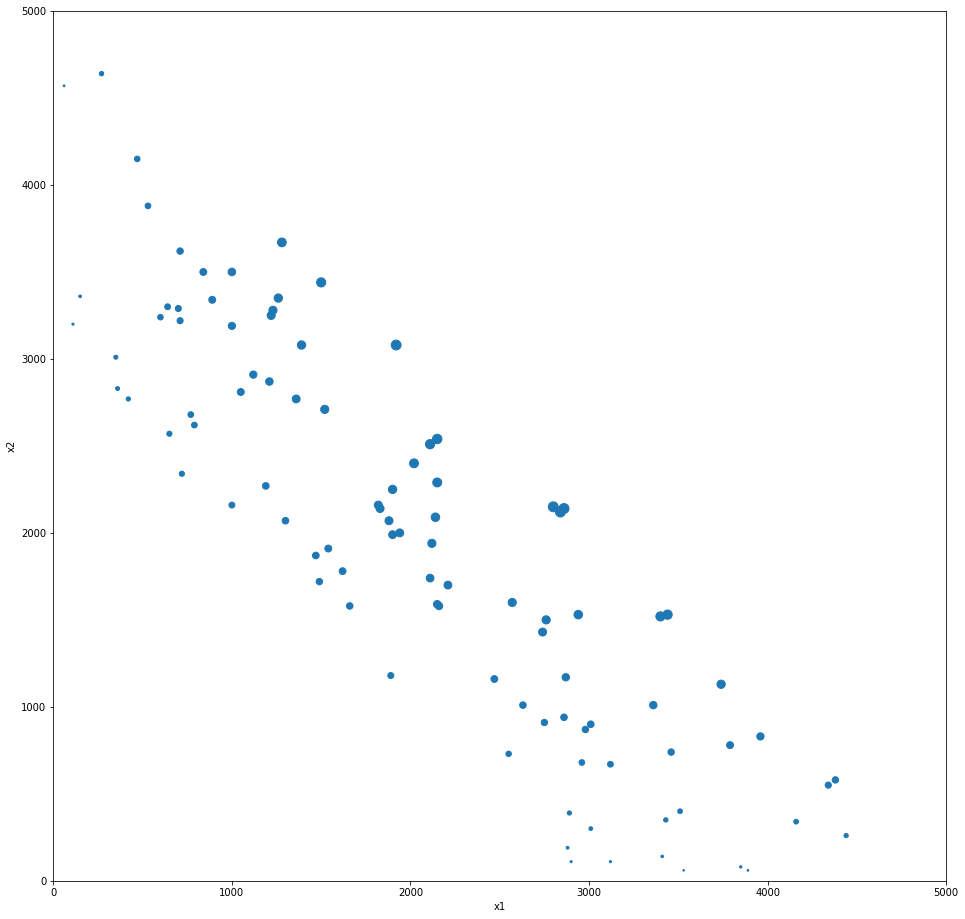

In [10]:
dummy_data.plot.scatter(x="x1", y="x2", s=dummy_data.y_s, figsize=(16,16), xlim=[0,5000], ylim=[0,5000])

In [11]:
plt.savefig('interaction_dat.png')

<Figure size 432x288 with 0 Axes>

,x1,x2,interaction,y
0,840,3500,2940000,294868
1,1000,3190,3190000,319838
2,720,2340,1684800,169092
3,3740,1130,4226200,423594
4,3360,1010,3393600,340234
...,...,...,...,...
95,2110,2510,5296100,530534
96,2800,2150,6020000,602990
97,1280,3670,4697600,470750
98,1000,3500,3500000,350900


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data = pd.read_csv("interaction_dummies.csv")[["x1", "x2", "y"]]
x, y = data.assign(
    # 交互作用項のカラムを作成
    x12=lambda df: df.x1 * df.x2
).pipe(
    # 説明変数と目的変数を抽出
    lambda df: (df[["x1", "x2", "x12"]], df.y)
)
model = LinearRegression()
model.fit(x, y)
print(model.coef_)

[0.2 0.2 0.1]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
model.coef_

array([0.2, 0.2, 0.1])